In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone

----
Linear Regression
----
____

We generate some linear looking data 

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100, 1)

In [3]:
def plot(X, y):
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_predict, "r-")
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([0, 2, 0, 14])

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # M.T = transpose of M

In [22]:
theta_best

array([[3.75872181],
       [3.23289983]])

Now we can make prediction using theta best

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [6]:
y_predict

array([[4.21467297],
       [9.93299415]])

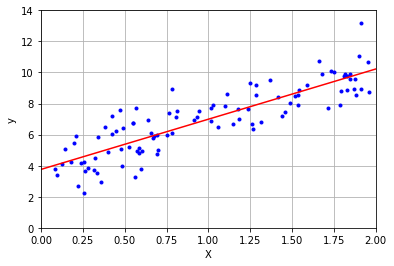

In [28]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.axis([0, 2, 0, 14])
plt.show()

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.75872181]), array([[3.23289983]]))

In [31]:
lin_reg.predict(X_new)

array([[ 3.75872181],
       [10.22452148]])

LinearRegression is based on np.linalg.lstsq(stands for least squares) this function compute theta = $X^{+}$ where $X^+$ is the pseudo inverse of X

In [32]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.75872181],
       [3.23289983]])

In [34]:
np.linalg.pinv(X_b).dot(y)

array([[3.75872181],
       [3.23289983]])

----
Gradient Descent
----
----
When we use gradient descent,  we must ensure that all features have the same scale using StandardScaler

Batch Gradient Descent
----
Computes the gradient descent on all training set

In [35]:
eta=0.1 # learning rate
n_iterations = 100
m=100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients


In [36]:
theta

array([[3.71743612],
       [3.26831838]])

To find a good learning rate we can use grid search

Stachastic Gradient descent
----
Computes the gradient descent on random instances in the training set. The advantage is that this algorithm is much faster than the first one as it is not using all the training set. However the algo can never set up at the minima

In [39]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [40]:
theta

array([[3.71763111],
       [3.21730823]])

In [7]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [8]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25793703]), array([2.90074849]))

Mini-batch Gradient Descent
----

Min batch GD computes the gradient on small random sets of instances called mini-batches. Main advantage of Mini-batch GD over stochastic GD is that you can get a performance boost from hardware optimization.


<table>
    <thead>
        <tr>
            <th>Algorithm</th>
            <th align="center">large number of training instance</th>
            <th align="center">Out of core support</th>
            <th align="center">Large number of features</th>
            <th align="center">Hyperparams</th>
            <th align="center">Sacling Required</th>
            <th align="right">Scikit learn </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Normal Equation</td>
            <td align="left">Fast</td>
            <td align="center">No</td>
            <td align="center">Slow</td>
            <td align="center">0</td>
            <td align="center">No</td>
            <td align="right">N/A</td>
        </tr>
        <tr>
            <td>SVD</td>
            <td align="left">Fast</td>
            <td align="center">No</td>
            <td align="center">Slow</td>
            <td align="center">0</td>
            <td align="center">No</td>
            <td align="right">LinearRegressor</td>
        </tr>
        <tr>
            <td>Batch GD</td>
            <td align="left">Slow</td>
            <td align="center">No</td>
            <td align="center">Fast</td>
            <td align="center">2</td>
            <td align="center">Yes</td>
            <td align="right">SGDRegressor</td>
        </tr>
        <tr>
            <td>Stochastic GD</td>
            <td align="left">Fast</td>
            <td align="center">Yes</td>
            <td align="center">Fast</td>
            <td align="center">>=2</td>
            <td align="center">Yes</td>
            <td align="right">SGDRegressor</td>
        </tr>
        <tr>
            <td>Mini-batch GD</td>
            <td align="left">Fast</td>
            <td align="center">Yes</td>
            <td align="center">Fast</td>
            <td align="center">>=2</td>
            <td align="center">Yes</td>
            <td align="right">SGDRegressor</td>
        </tr>
    </tbody>
</table>

Polynomial Regression
----

In [2]:
m=100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

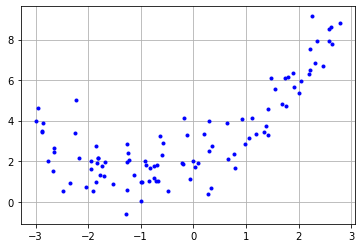

In [5]:
plt.plot(X, y, "b.")
plt.axis(emit=True)
plt.grid("on")
plt.show()

PolynomialFeatures adds $X^2$ to the training set so that a linear regression could work

In [18]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.04298897])

In [6]:
X_poly[0] # (X, X**2)

array([0.08218407, 0.00675422])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # c and (b, a) if y = aX**2 + bX + c

(array([1.96302272]), array([[1.05194502, 0.51376933]]))

In [49]:
X_predict = np.linspace(-3, 3)
y_predict = lin_reg.coef_[0, 1]*X_predict**2 + lin_reg.coef_[0, 0]*X_predict + lin_reg.intercept_

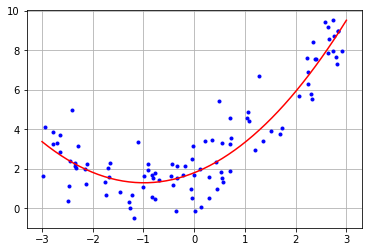

In [51]:
plt.plot(X, y, "b.")
plt.plot(X_predict, y_predict, "r-")
plt.grid()

Learning Curves
----
plots of model's performance on the training set and the validation set. To generate the plot, train the model several times on different sized subsets of the training set

In [15]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label="val")

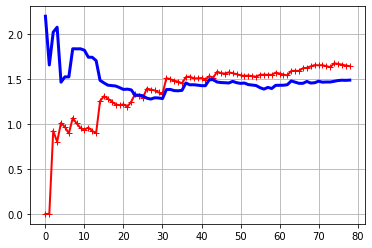

In [20]:
plot_learning_curves(lin_reg, X, y)
plt.grid()

In [23]:
polynomial_reg =Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

(0.0, 80.0, 0.0, 3.0)

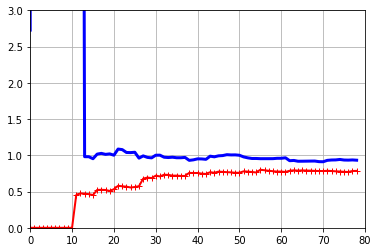

In [24]:
plot_learning_curves(polynomial_reg, X, y)
plt.grid()
plt.axis([0, 80, 0, 3])

Bias/variance Trade-off
----
 * Bias  
This part of generalization error due to wrong assumption, such as assuming this is a linear model when it's a polynomial one. It's likely to generate underfitting
 * Variance
This part is due to the model extreme sensitivy to small variations in the training data. It's likely to generate overfitting

Regularized Linear Model 
----
A good way to reduce overfitting is regularization. For linear model regularization is typically achieved by constraining the weights of the model.

Ridge Regression
----

$J(\theta) = MSE(\theta) + \alpha \frac 1 2 \sum_{i=1}^{n} \theta i ^ 2$ , the second term is a regularization term to minimize the model weights, it is used only for training set, if $\alpha$ is very large all weights will be close to 0

It is important to scale the data before performing the ridge regression

In [3]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82866704]])

In [4]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.79801607])

Lasso Regression
----

$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta|$, it tends to eliminate the weights of the least important features.

In [8]:
lasso_reg = Lasso(alpha = 0.1) # Equivalent to SGD_regressor("penalty"=l1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77339848])

Elastic Net
----
$J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac {1-r} 2 \sum_{i=1}^{n} \theta_i^2$, a mix between Lasso and Ridge regression 

In [11]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.7758796])

Early Stopping 
----


A way to regularize algo such as Gradient descent is to stop trainig when the error reaches a minimum, it's early stopping.


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol = -np.infty, warm_start = True, penalty=None, learning_rate ="constant", eta0=0.0005)

min_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Logistic Regression
----


----
IRIS DETECTION
----

In [5]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [3]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [9]:
X = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris virginica, 0 else

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

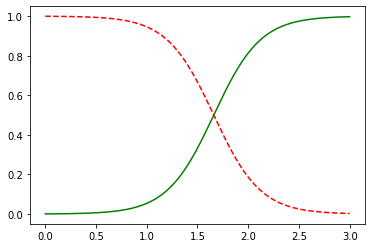

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "r--", label="Not Iris Virginica")

In [14]:
log_reg.predict([[1.5],[1.7]])

array([0, 1])

In [16]:
X = iris["data"][:, (2,3)] #petal length petal width
y = iris["target"] #1 if Iris virginica, 0 else

In [17]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [20]:
softmax_reg.predict([[5, 2]])

array([2])

In [21]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])